In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('sales.csv')
df.isnull().sum().sum()

/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_69749/3300080983.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales.csv')


0

In [3]:
df.dtypes
df['order_date'] = pd.to_datetime(df['order_date'],utc=True)
df.columns = df.columns.str.lower()
df = df[['order_id','order_date','status', 'item_id', 'qty_ordered', 'price', 'value', 'county','payment_method','total','category','gender','age','user name','state','discount_percent']]




In [4]:
df.shape
df.head()

,order_id,order_date,status,item_id,qty_ordered,price,value,county,payment_method,total,category,gender,age,user name,state,discount_percent
0,100354678,2020-10-01 00:00:00+00:00,received,574772.0,21.0,89.9,1798.0,Harmon,cod,1798.0,Men's Fashion,F,43.0,jwtitus,OK,0.0
1,100354678,2020-10-01 00:00:00+00:00,received,574774.0,11.0,19.0,190.0,Harmon,cod,190.0,Men's Fashion,F,43.0,jwtitus,OK,0.0
2,100354680,2020-10-01 00:00:00+00:00,complete,574777.0,9.0,149.9,1199.2,Harmon,cod,1199.2,Men's Fashion,F,43.0,jwtitus,OK,0.0
3,100354680,2020-10-01 00:00:00+00:00,complete,574779.0,9.0,79.9,639.2,Harmon,cod,639.2,Men's Fashion,F,43.0,jwtitus,OK,0.0
4,100367357,2020-11-13 00:00:00+00:00,received,595185.0,2.0,99.9,99.9,Harmon,cod,99.9,Men's Fashion,F,43.0,jwtitus,OK,0.0


In [5]:
df = df.assign(check=lambda x: x['value'] == x['total'])
df = df.drop(df[df.check == False].index)
df.shape

(200658, 17)

In [6]:
df[['age','total']].describe()

,age,total
count,200658.000000,200658.000000
mean,46.528496,683.647000
std,16.697621,2150.979013
min,18.000000,0.000000
25%,32.000000,36.300000
50%,47.000000,99.900000
75%,61.000000,347.500000
max,75.000000,101262.590000


/var/folders/1_/83qhk9ps6fd0yym23nn9nfz00000gn/T/ipykernel_69749/2034052863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

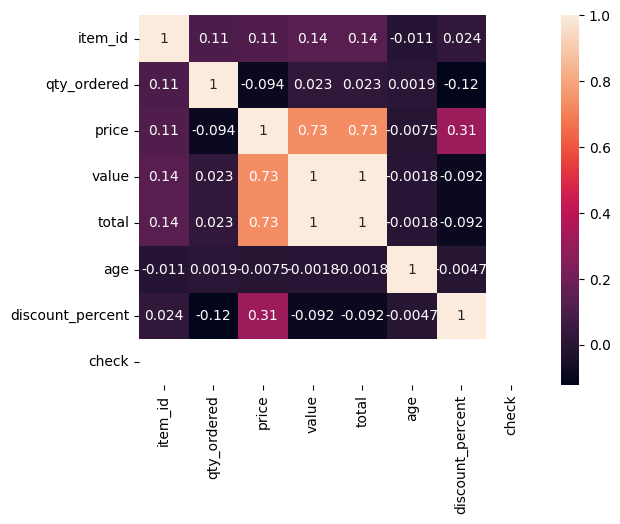

In [7]:
df.drop_duplicates()
corr = df.corr()
sns.heatmap(corr,annot=True)

In [8]:
df1 = df[['total', 'state','category','user name']]
df1.groupby('category')['user name'].count()

category
Appliances            17636
Beauty & Grooming     13885
Books                   779
Computing              4760
Entertainment          7360
Health & Sports        7318
Home & Living         10987
Kids & Baby            5458
Men's Fashion         33593
Mobiles & Tablets     34365
Others                25695
School & Education      994
Soghaat                6050
Superstore             9234
Women's Fashion       22544
Name: user name, dtype: int64

<AxesSubplot: xlabel='category'>

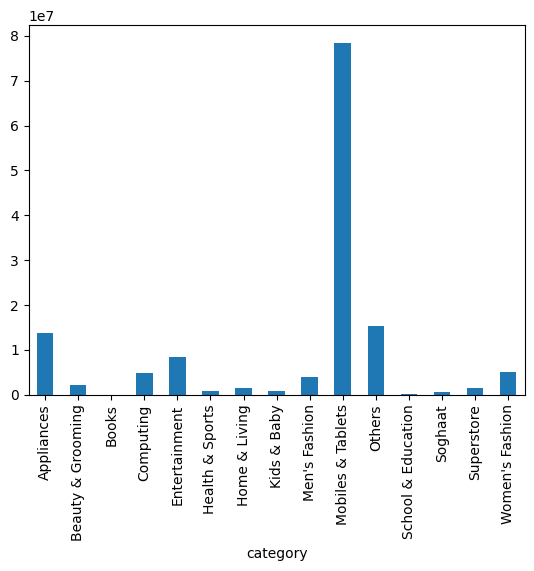

In [9]:
revenue = df1.groupby('category')['total'].sum()
revenue.plot(kind='bar')

<AxesSubplot: xlabel='order_date'>

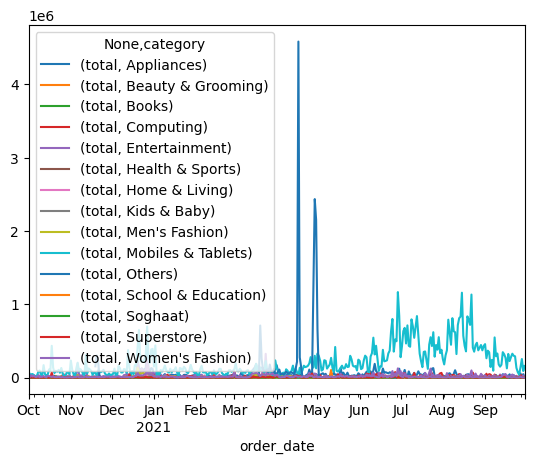

In [10]:
df2 = df[['order_date', 'category', 'total']]
time_data = df2.groupby(['order_date', 'category']).sum().unstack()
time_data.plot()

<AxesSubplot: xlabel='None-category', ylabel='None-category'>

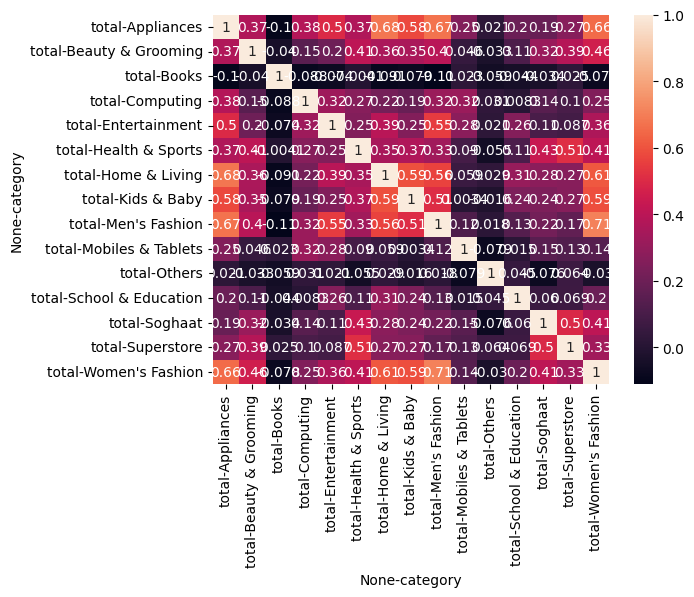

In [11]:
corr = time_data.corr()
sns.heatmap(corr,annot=True)

In [12]:
df.groupby(['status', 'category'])['order_id'].count().unstack().T['canceled']

category
Appliances             7237.0
Beauty & Grooming      3286.0
Books                   115.0
Computing              1985.0
Entertainment          3829.0
Health & Sports        1064.0
Home & Living          2851.0
Kids & Baby            1498.0
Men's Fashion          8108.0
Mobiles & Tablets     19687.0
Others                17129.0
School & Education      283.0
Soghaat                2103.0
Superstore             2595.0
Women's Fashion        5755.0
Name: canceled, dtype: float64

In [13]:
rslt_df = df[df['status'] == 'complete']
rslt_df.shape

(51886, 17)

In [14]:
rslt_df.head()

,order_id,order_date,status,item_id,qty_ordered,price,value,county,payment_method,total,category,gender,age,user name,state,discount_percent,check
2,100354680,2020-10-01 00:00:00+00:00,complete,574777.0,9.0,149.9,1199.2,Harmon,cod,1199.2,Men's Fashion,F,43.0,jwtitus,OK,0.0,True
3,100354680,2020-10-01 00:00:00+00:00,complete,574779.0,9.0,79.9,639.2,Harmon,cod,639.2,Men's Fashion,F,43.0,jwtitus,OK,0.0,True
31,100359410,2020-10-24 00:00:00+00:00,complete,583004.0,11.0,199.0,1990.0,Grand Forks,cod,1990.0,Appliances,M,65.0,jgsimoneau,ND,0.0,True
32,100359558,2020-10-25 00:00:00+00:00,complete,583239.0,11.0,199.9,1999.0,Grand Forks,cod,1999.0,Appliances,M,65.0,jgsimoneau,ND,0.0,True
55,100354689,2020-10-01 00:00:00+00:00,complete,574792.0,3.0,265.0,530.0,Fayette,Payaxis,530.0,Men's Fashion,F,71.0,eeraminez,IL,0.0,True


In [15]:
rdf = rslt_df
rdf = rdf.loc[rdf.index.repeat(rdf.qty_ordered)].reset_index(drop=True)
rdf = rdf[['order_date', 'item_id', 'price', 'category', 'gender', 'age', 'state', 'user name', 'discount_percent']]
rdf.shape


(148599, 9)